# Regression with scikit-learn

Utilized scikit-learn package to perform regression. Trained the regression models with the split of training and validation data.

Regression problem can be categorized to the **supervised machine learning** problem, predicting a number.

- simple linear regression
- polynomial regression
- user-defined function of linear regression
- More type of regressions (KNN, random forest, MLP)

In [69]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## Simple Linear Regression
Training the simple linear regression model given the training data

$$ y = c_0  + c_1 \cdot x $$

Training and validation are split as 0.75:0.25. If training score >> validation score, model is overfitted.

train score = 0.9741684395803113
validation score = 0.9593096617733226
weights: c0 = 0.7369711398944006, c1 = 1.0027939097933254


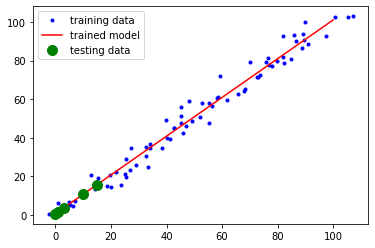

In [70]:
from sklearn.linear_model import LinearRegression

# step1: Prepare data
n = 100 # sample size
x = np.linspace(0, 100, n) + normal(loc=0, scale=4, size=n)
y = np.linspace(0, 100, n) + normal(loc=0, scale=4, size=n)
X = np.stack([x], axis=1) # scikit-learn wants to have 2D X
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X_train, y_train, 'b.', label="training data")

# step2: Choose a model
model = LinearRegression(fit_intercept=True) # y = c0 + c1 * x

# OR appending intercept
# X_train = np.concatnate([np.ones(X_train.shape), X_train])
# model = inearRegression(fit_intercept=False) # y = c0 + c1 * x

# step3: Train a model with split of training data and validation data
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data

c0 = model.intercept_
c1 = model.coef_[0]
print(f"weights: c0 = {c0}, c1 = {c1}")
x_model = np.linspace(0, 100, n)
y_model =  c0 +  c1 * x_model
plt.plot(x_model, y_model, c='r', label="trained model")

# step 4: Prediction
x_test = np.array([0,1,3,10,15])
X_test = np.stack([x_test], axis=1)
y_test = model.predict(X_test)
plt.plot(x_test, y_test, "g.", markersize=20, label="testing data")
plt.legend()
plt.show()

## Polynomial Regresion

Training the polynomial linear regression of degree 11 given the training data $x$ and $y$:

$$ y = \sum_{i} c_i \cdot x^{i} $$

train score = 0.8479335622232853
weights: [ 0.00000000e+00  6.63707359e+01 -1.92916791e+01 -9.34645490e+00
  7.13517029e+00  1.85937569e+00 -6.04409041e-01 -1.44598178e-01
  1.99252590e-02  4.58942744e-03 -2.25990145e-04 -5.06471388e-05]


Polynomial([ 0.00000000e+00,  6.63707359e+01, -1.92916791e+01, -9.34645490e+00,
        7.13517029e+00,  1.85937569e+00, -6.04409041e-01, -1.44598178e-01,
        1.99252590e-02,  4.58942744e-03, -2.25990145e-04, -5.06471388e-05], domain=[-1,  1], window=[-1,  1])

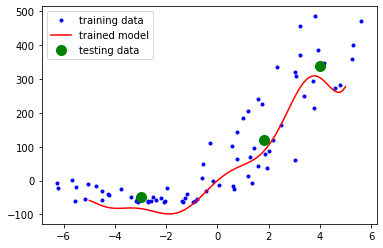

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.polynomial import Polynomial 

## step1: Prepare data
n = 100 # sample size
x = np.linspace(-5, 5, n) + normal(loc=0, scale=1, size=n)
y = np.linspace(-5, 5, n) * np.linspace(0, 100, n) + normal(loc=0, scale=1, size=n)
X = np.stack([x], axis=1) # scikit-learn wants to have 2D X
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X_train, y_train, 'b.', label="training data")

# obtaining polynomial features
poly = PolynomialFeatures(degree=11, interaction_only=False, include_bias=True)
X_train = poly.fit_transform(X_train)

## step2: Choose a model
model = LinearRegression(fit_intercept=True)

## step3: Train a model with training data X_train and y_train
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
print(f"train score = {train_score}") # evaluate the score with training data

# validation not working why?
# valid_score = model.score(X_valid, y_valid)
# print(f"validation score = {valid_score}") # evaluate the score with validation data

print(f"weights: {model.coef_}")
x_model = np.linspace(-5, 5, n)
p = Polynomial(model.coef_) # use this to evaluate polynomial
display(p)
y_model = p(x_model)
plt.plot(x_model, y_model, c='r', label="trained model")

## step 4: Prediction
x_test = np.array([-3, 1.8, 4])
X_test = np.stack([x_test], axis=1)
y_test = model.predict(poly.fit_transform(X_test))
plt.plot(x_test, y_test, "g.", markersize=20, label="testing data")
plt.legend()
plt.show()

## Polynomial Regresion (more general)

This time, we use the `sklearn.preprocessing.make_pipeline` to have a more general version of the code.

Training the polynomial linear regression of degree 11 given the training data $x$ and $y$:

$$ y = \sum_{i} c_i \cdot x^{i} $$

See:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

train score = 0.9102064137238466
validation score = 0.6894394690565802


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=11)),
                ('linearregression', LinearRegression())])

weights: [ 0.00000000e+00  5.77054188e+00  1.72592142e+01  1.44399227e+01
 -1.63004961e+00 -1.87925494e+00  1.00533789e-01  1.04880484e-01
 -2.69832039e-03 -2.60212970e-03  2.54537281e-05  2.34204215e-05]


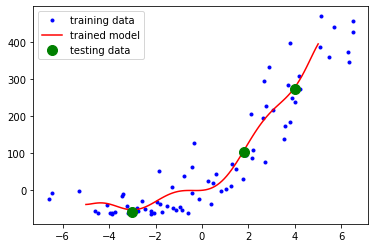

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from numpy.polynomial import Polynomial 

## step1: Prepare data
n = 100 # sample size
x = np.linspace(-5, 5, n) + normal(loc=0, scale=1, size=n)
y = np.linspace(-5, 5, n) * np.linspace(0, 100, n) + normal(loc=0, scale=1, size=n)
X = np.stack([x], axis=1) # scikit-learn wants to have 2D X
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X_train, y_train, 'b.', label="training data")

## step2: Choose a model
model = make_pipeline(
    PolynomialFeatures(degree=11, interaction_only=False, include_bias=True),
    LinearRegression(fit_intercept=True)
)

## step3: Train a model with training data X_train and y_train
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

# plot the learned curve
coef = model.named_steps['linearregression'].coef_
print(f"weights: {coef}")
x_model = np.linspace(-5, 5, n)
p = Polynomial(coef) # use this to evaluate polynomial
y_model = p(x_model)
plt.plot(x_model, y_model, c='r', label="trained model")

## step 4: Prediction
x_test = np.array([-3, 1.8, 4])
X_test = np.stack([x_test], axis=1)
y_test = model.predict((X_test))
plt.plot(x_test, y_test, "g.", markersize=20, label="testing data")
plt.legend()
plt.show()

## User-defined Function Regression

Use `sklearn.preprocessing.FunctionTransformer` to make a user-defined function model in the pipeline. The model is:

$$ y = c_0 + c_1 \cdot x + c_2 \cdot  \frac{1}{1 + e^{^-x}}$$

train score = 0.9909895340074846
validation score = 0.9883904918870254


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function logisticFunc at 0x0000021D7E53A7B8>,
                                     validate=True)),
                ('linearregression', LinearRegression(fit_intercept=False))])

weights: [ 0.98043066 -0.00462613 -0.95549368]


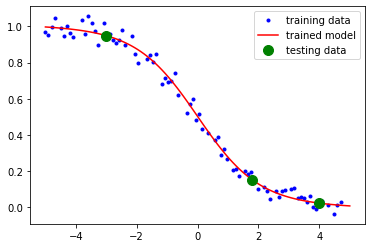

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

def logisticFunc(X):
    ones = np.ones(X.shape)
    F = 1 / ( 1 + np.exp(-X) )
    result = np.concatenate( [ones, X, F], axis=1 ) # 2d np array
    return result

## step1: Prepare data
n = 100 # sample size
x = np.linspace(-5, 5, n)
y = 1 / ( 1 + np.exp(np.linspace(-5, 5, n)) ) + normal(loc=0, scale=0.04, size=n)
X = np.stack([x], axis=1) # scikit-learn wants to have 2D X
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75) # split the data with training and validation data
plt.plot(X_train, y_train, 'b.', label="training data")

## step2: Choose a model
model = make_pipeline(
    FunctionTransformer(logisticFunc, validate=True),
    LinearRegression(fit_intercept=False) # false because ones is included
)

## step3: Train a model with training data X_train and y_train
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

# plot the learned curve
coef = model.named_steps['linearregression'].coef_
print(f"weights: {coef}")
x_model = np.linspace(-5, 5, n)
y_model = coef[0] + coef[1] * x_model + coef[2] *   1 / ( 1 + np.exp(- x_model) )
plt.plot(x_model, y_model, c='r', label="trained model")

## step 4: Prediction
x_test = np.array([-3, 1.8, 4])
X_test = np.stack([x_test], axis=1)
y_test = model.predict((X_test))
plt.plot(x_test, y_test, "g.", markersize=20, label="testing data")
plt.legend()
plt.show()

# More regression with scikit-learn

See the classification for where these regressor come from.

## k-nearest neighbor regressor,  random forest regressor, Multi-layer perceptron regressor

KNN regressor performed reasonable to some extent.
Tree based regressor may not work well in this regression problem.
neural network based model performed well.

train score = 0.7241269391571761
validation score = 0.7282015298523534


Pipeline(steps=[('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

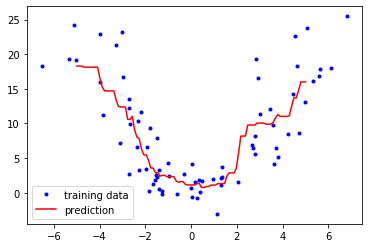

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

## step1: Prepare data
n = 100 # sample size
x = np.linspace(-5, 5, n) + normal(loc=0, scale=1, size=n)
y = np.linspace(-5, 5, n) ** 2 + normal(loc=0, scale=1, size=n)
X = np.stack([x], axis=1) # scikit-learn wants to have 2D X
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X_train, y_train, 'b.', label="training data")

## step2: Choose a model
model = make_pipeline(
    KNeighborsRegressor(n_neighbors=10, weights="uniform")
)

## step3: Train a model with training data X_train and y_train
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)


## step 4: Prediction
x_test = np.linspace(-5,5,100)
X_test = np.stack([x_test], axis=1)
y_test = model.predict((X_test))
plt.plot(x_test, y_test, "r-", markersize=5, label="prediction")
plt.legend()
plt.show()

train score = 0.9179987085387248
validation score = 0.3188398267413969


Pipeline(steps=[('randomforestregressor', RandomForestRegressor(max_depth=7))])

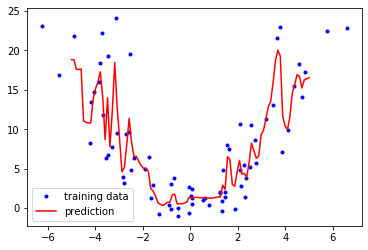

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

## step1: Prepare data
n = 100 # sample size
x = np.linspace(-5, 5, n) + normal(loc=0, scale=1, size=n)
y = np.linspace(-5, 5, n) ** 2 + normal(loc=0, scale=1, size=n)
X = np.stack([x], axis=1) # scikit-learn wants to have 2D X
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X_train, y_train, 'b.', label="training data")

## step2: Choose a model
model = make_pipeline(
    RandomForestRegressor(n_estimators=100, max_depth=7)
)

## step3: Train a model with training data X_train and y_train
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)


## step 4: Prediction
x_test = np.linspace(-5,5,100)
X_test = np.stack([x_test], axis=1)
y_test = model.predict((X_test))
plt.plot(x_test, y_test, "r-", markersize=5, label="prediction")
plt.legend()
plt.show()

train score = 0.5581548494073056
validation score = 0.41880173154634115


Pipeline(steps=[('mlpregressor',
                 MLPRegressor(alpha=1.0, hidden_layer_sizes=(100, 200, 100),
                              max_iter=500, random_state=0))])

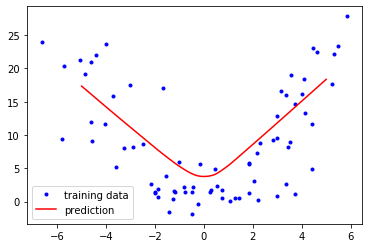

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

## step1: Prepare data
n = 100 # sample size
x = np.linspace(-5, 5, n) + normal(loc=0, scale=1, size=n)
y = np.linspace(-5, 5, n) ** 2 + normal(loc=0, scale=1, size=n)
X = np.stack([x], axis=1) # scikit-learn wants to have 2D X
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X_train, y_train, 'b.', label="training data")

## step2: Choose a model
# construct the 3 layers with 100, 200, 100 perceptrons of network model
model = make_pipeline(
    MLPRegressor(solver='adam', activation='relu', hidden_layer_sizes=(100,200,100), 
                 random_state=0, alpha=1.0, max_iter=500)
)

## step3: Train a model with training data X_train and y_train
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)


## step 4: Prediction
x_test = np.linspace(-5,5,100)
X_test = np.stack([x_test], axis=1)
y_test = model.predict((X_test))
plt.plot(x_test, y_test, "r-", markersize=5, label="prediction")
plt.legend()
plt.show()